# ***MINI PROJECT                                                                                                        ***
# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.
We will handle this problem in a structured way. We will be following the table of content given below.

1).Problem Statement

2).Hypothesis Generation

3).Loading Packages and Data

4).Data Structure and Content

5).Exploratory Data Analysis

6).Univariate Analysis

7).Bivariate Analysis

8).Missing Value Treatment

9).Feature Engineering

10).Encoding Categorical Variables

11).Label Encoding

12).One Hot Encoding

13).PreProcessing Data

14).Modeling

15).Linear Regression

16).Regularized Linear Regression

17).RandomForest

18).XGBoost

19).Summary







# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation

## Some theories based on the problem statement are listed below.

1.Urban stores have more sales.

2.Weekends see a spike in sales.

3.Morning and late-night sales are higher.

4.Branded products have higher sales.

5.During the year's end, sales increased.

6.Sales are influenced by a store's size.

7.The store's location has an impact on its sales.

8.More shelf space means better sales for the items.

9.Better the advertising more is the sales.

10.Products with more offers and discounts have better sales.

11.Densely populated area stores have better sales.

# Loading Packages and Data

## The details of each column is given below

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : % of total display area in store allocated to this product

Item_Type : Category to which product belongs

Item_MRP : Maximum Retail Price (list price) of product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : Year in which store was established

Outlet_Size : Size of the store

Outlet_Location_Type : Type of city in which store is located

Outlet_Type : Grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of product in particular store. This is the outcome 
variable to be predicted.

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#warning hadle
import warnings# warning filter
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape

(8523, 12)

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test.shape

(5681, 11)

In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Data Structure and Content

In [11]:
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)
print(df.head())

(8523, 13) (5681, 12) (14204, 13)
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1

# Exploratory Data Analysis

In [12]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [15]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

# Univariate Analysis

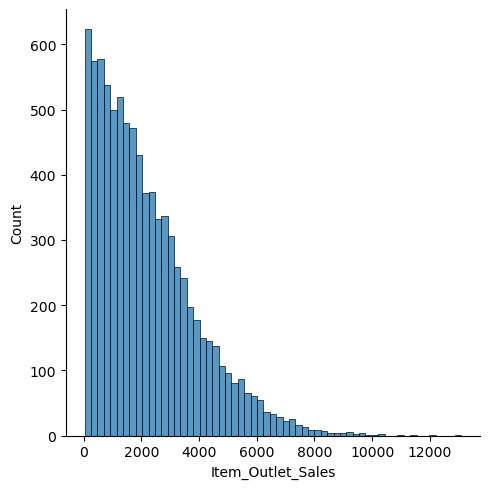

In [16]:
sns.displot(df['Item_Outlet_Sales'])

<Axes: >

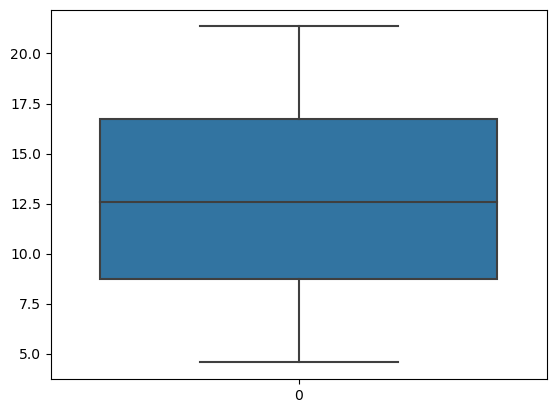

In [17]:
sns.boxplot(df['Item_Weight'])

<Axes: xlabel='Outlet_Size', ylabel='count'>

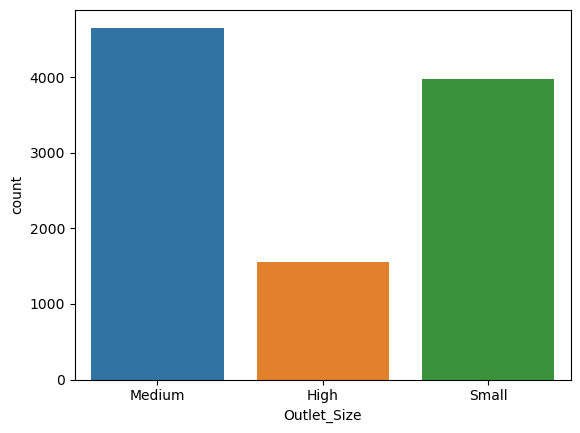

In [18]:
sns.countplot(x='Outlet_Size',data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

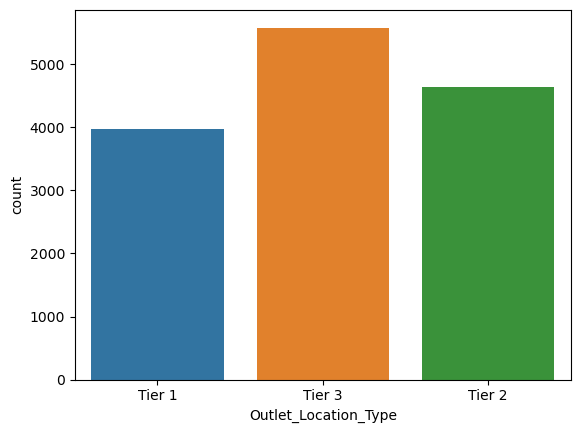

In [19]:
sns.countplot(x='Outlet_Location_Type',data=df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

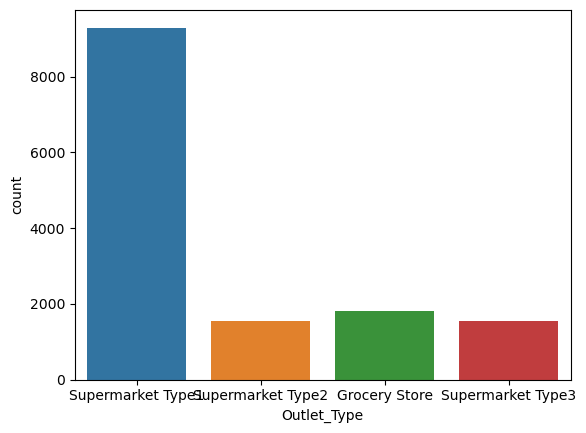

In [20]:
sns.countplot(x='Outlet_Type',data=df)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

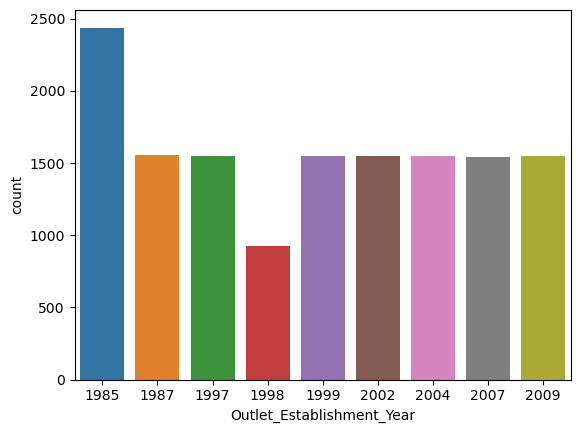

In [21]:
sns.countplot(x='Outlet_Establishment_Year',data= df)

We can see that the Outlet_sales is normally distributed with right skewness.Most of the items have weight in range of 8-16. The mode of weight is near to 13. Medium sized outlets are more in number. Also Tier 3 outlets are more common. Type 1 supermarket is the most common. Most of the outlets establishment is equally distributed.

# Bivariate Analysis

In [22]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

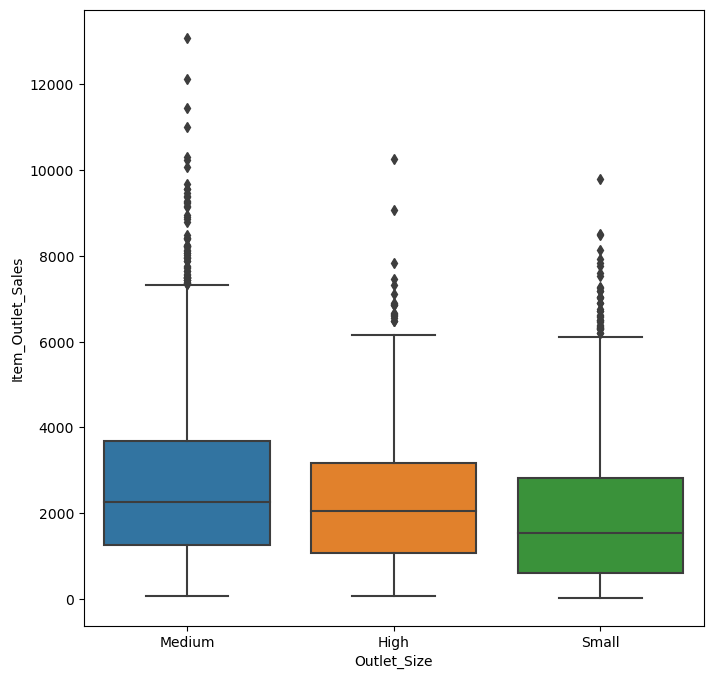

In [23]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

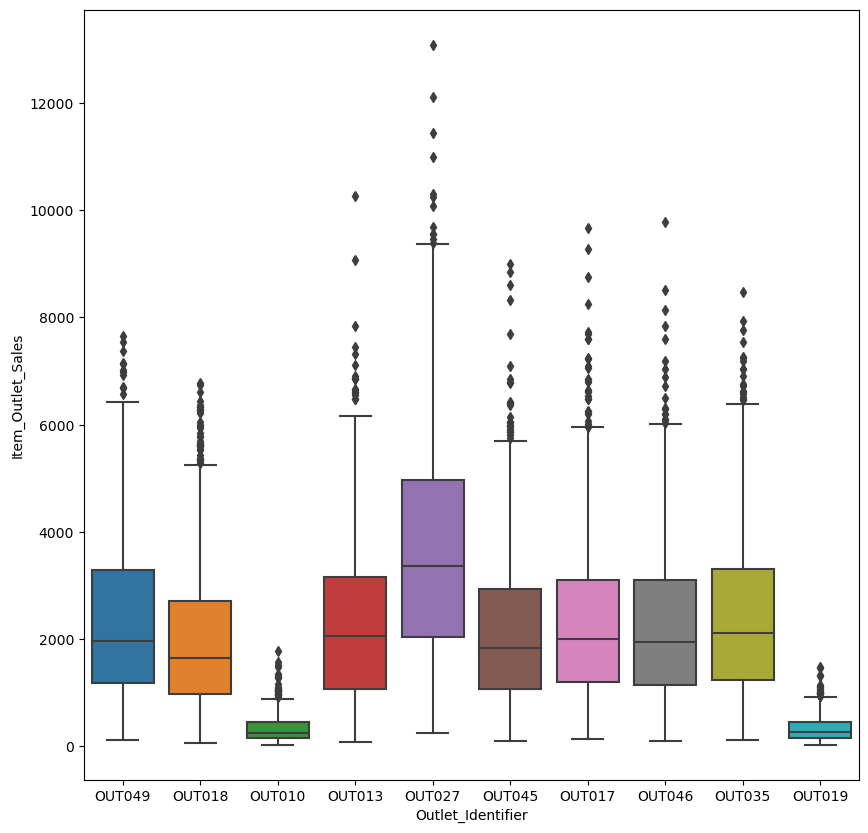

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

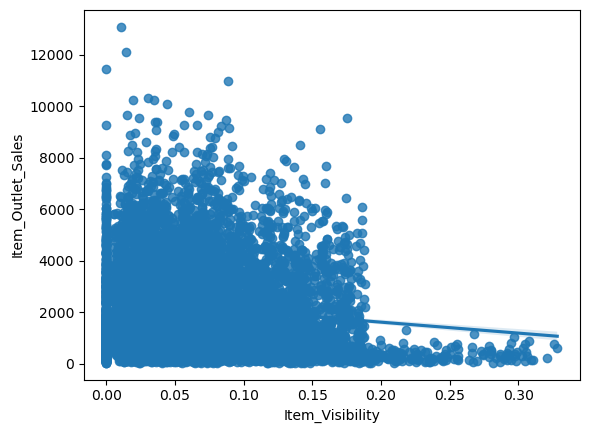

In [25]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

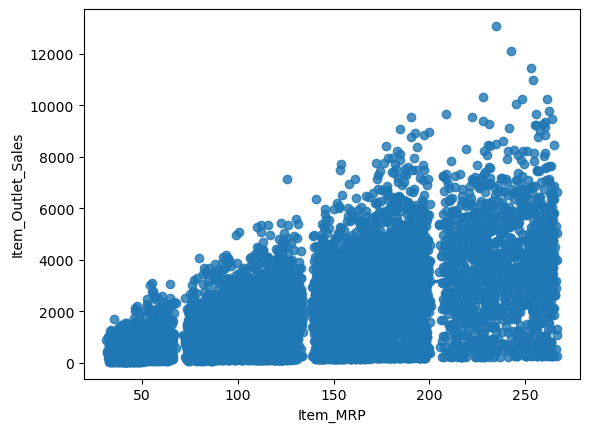

In [26]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)


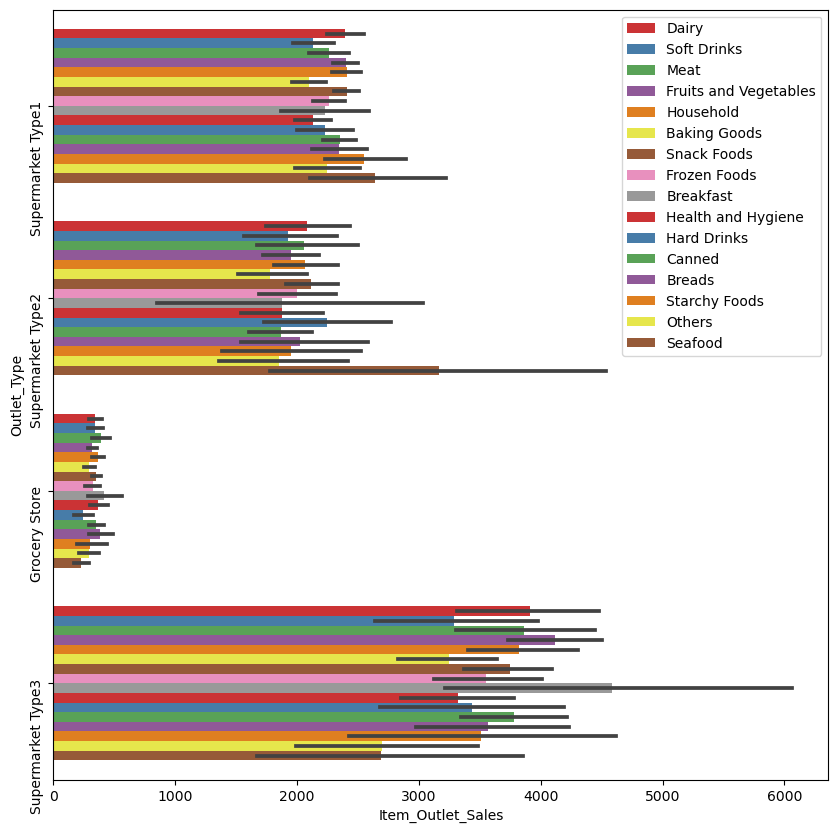

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.yticks(rotation=90)
plt.legend()

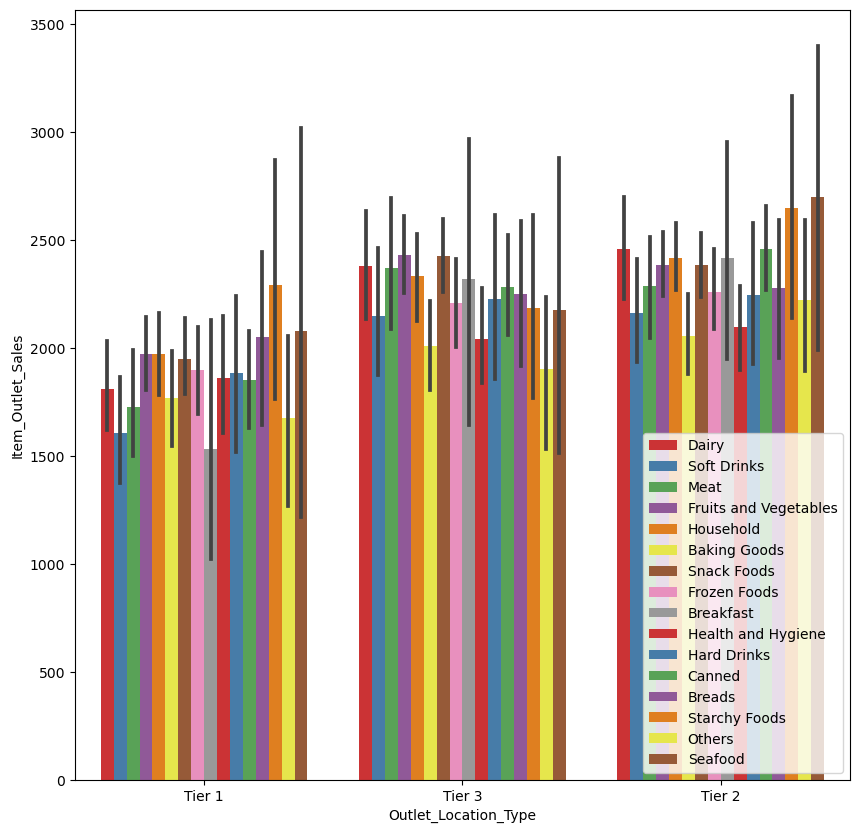

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type',palette='Set1')
plt.legend()

Outlet 27 has most sales. Medium outlets have larger sales. We can also note that maximum sales occurs at the visibility between 0- 0.19 , so there is a correlation between them.The string of points at Item_Visibility = 0.0 in the Item_Outlet_Sales table seems odd because item visibility cannot be entirely zero. This is something we'll keep in mind and take care of later.

We can plainly identify four pricing segments in the plot of item_MRP vs item_outlet_sales. We can day that the outlet location have impact on sales. Supermarket of type 3 has more sales.

# Missing Value Treatment

There are many ways data can end up with missing values. For example:

The product wasn't weighed.
The data provider didn't include the outlet size of some products.
Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

by numbers
by %
This analysis will also compare to the test and train datasets for evaluation.

The target variable, Item_Outlet_Sales, has missing values that are ones from the test set. Therefore, we need not be concerned. In the data cleaning stage, however, we'll impute the missing values for Item_Weight and Outlet_Size.

In [29]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [30]:
# fill missing value with mean
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())


In [31]:
#find mode of oulet size
m=df['Outlet_Size'].mode()
m

0    Medium
Name: Outlet_Size, dtype: object

In [32]:
#fill missing value with mode
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Feature Engineering

Categorical values:

We have 7 columns we need to delete or encode.

Ordinal variables:

Item_Fat_Content
Outlet_Size
Outlet_Location_Type
Nominal variables:

Item_Identifier
Item_Type
Outlet_Identifier
Outlet_Type
Numeric values:

From the numeric variables Outlet_Establishment_Year is no longer needed
Conclusion:

In my FE process i have decided:

The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them.
All Ordinal variables will be Label encoded.
The columns Outlet_Type and Item_Type will be One Hot encoded.

In [33]:
# we have seen that the categories in fat is not correct and we will change them
print (df['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (df['Item_Fat_Content'].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [34]:
#we saw minimum visibility value is 0, which makes no practical sense and so we consider it  as missing values
print ('Number of 0 values initially: %d'%(df['Item_Visibility']==0).sum())
df['Item_Visibility']= df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())
print('Number of 0 values finally: %d'%(df['Item_Visibility']==0).sum())

Number of 0 values initially: 879
Number of 0 values finally: 0


In [35]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Non consumable items cannot be low fat or high fat, so we need to change them to another catagory as Non - Edible.

In [36]:
#Mark non-consumables as separate category
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Encoding Categorical Variables and Label Encoding

In [37]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


# One Hot Encoding

In [38]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'],dtype=float)

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Fat_Content_2           float64
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
Outlet_Type_3                float64
Item_Type_Combined_0         float64
Item_Type_Combined_1         float64
Item_Type_Combined_2         float64
Outlet_0                     float64
Outlet_1                     float64
O

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.93,0.065953,Household,53.8614,OUT013,1987,994.7052,train,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PreProcessing Data

In [40]:
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)



# Modelling

In [41]:

from sklearn.model_selection import train_test_split

# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [42]:
from sklearn.model_selection  import cross_val_score as CVS
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. 

Root mean squared error (RMSE) is the square root of the mean of the square of all of the error.Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.


# Linear Regression

When modeling the relationship between a scalar response (also known as the dependent variable) and one or more explanatory variables (often known as the independent variables), linear regression is a linear technique.

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
#fit
lr.fit(X_train,y_train)

# Predict
predicted = lr.predict(X_test)
LR_CS  = round(CVS(lr, X, y, cv=5).mean(),4)

# Score Metrics for Regression:

print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lr.score(X_test,y_test))
cross_val(lr,LinearRegression(),X,y,5)

MEAN SQUARED ERROR(MSE) 1196692.26109902
MEAN ABSOLUTE ERROR(MAE) 823.117439434841
ROOT MEAN SQUARED ERROR(RMSE) 1093.9343038313682
SCORE 0.5650369709323421
LinearRegression() Scores:
0.57
0.56
0.55
0.57
0.57
Average LinearRegression() score: 0.5611


In [44]:
# saving files
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':predicted})
Linear_Regression.to_csv("Linear Regression.csv")    


# Regularized Linear Regression

 Regularized Linear Regression is of two types.

As a regression analysis technique in statistics and machine learning, lasso (least absolute shrinkage and selection operator; also referred to as LASSO or LASSO) performs both variable selection and regularization in order to improve the predictability and interpretability of the statistical model it generates.

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. 

In [45]:

# Lasso linear regression
from sklearn.linear_model import Lasso ,Ridge
lasso = Lasso(alpha=0.05)

# Fit
lasso.fit(X_train, y_train)

# Predict
predicted = lasso.predict(X_test)
LS_CS  = round(CVS(lasso, X, y, cv=5).mean(),4)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lasso.score(X_test,y_test))
cross_val(lasso,Lasso(alpha = 0.05),X,y,5)

MEAN SQUARED ERROR(MSE) 1196612.9829943038
MEAN ABSOLUTE ERROR(MAE) 823.0976807224398
ROOT MEAN SQUARED ERROR(RMSE) 1093.8980679178037
SCORE 0.5650657862307166
Lasso(alpha=0.05) Scores:
0.57
0.56
0.55
0.57
0.57
Average Lasso(alpha=0.05) score: 0.5611


In [46]:
# saving files
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':predicted})
Lasso_Regressor.to_csv("Lasso Regressor.csv")    

In [47]:
# Ridge linear regression
from sklearn.linear_model import Lasso ,Ridge
Rg = Ridge(alpha=0.05)

# Fit
Rg.fit(X_train, y_train)

# Predict
predicted = Rg.predict(X_test)
RS_CS  = round(CVS(Rg, X, y, cv=5).mean(),4)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",Rg.score(X_test,y_test))
cross_val(Rg,Ridge(),X,y,5)

MEAN SQUARED ERROR(MSE) 1196689.0036419316
MEAN ABSOLUTE ERROR(MAE) 823.1165194018436
ROOT MEAN SQUARED ERROR(RMSE) 1093.932814957999
SCORE 0.5650381549237895
Ridge(alpha=0.05) Scores:
0.57
0.56
0.55
0.57
0.57
Average Ridge(alpha=0.05) score: 0.5611


In [48]:
# saving files
Ridge_Regressor=pd.DataFrame({'y_test':y_test,'prediction':predicted})
Ridge_Regressor.to_csv("Lasso Regressor.csv")  

#Decision Tree  Regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [49]:
from sklearn.tree import DecisionTreeRegressor
des = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

# Fit
des.fit(X_train, y_train)

# Predict
predicted = des.predict(X_test)
Des_CS  = round(CVS(des, X, y, cv=5).mean(),4)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",des.score(X_test,y_test))
cross_val(des,DecisionTreeRegressor(max_depth=15, min_samples_leaf=100),X,y,5)

MEAN SQUARED ERROR(MSE) 1130485.8253423239
MEAN ABSOLUTE ERROR(MAE) 749.7110127825957
ROOT MEAN SQUARED ERROR(RMSE) 1063.2430697363252
SCORE 0.5891010956673502
DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) Scores:
0.6
0.58
0.56
0.6
0.59
Average DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) score: 0.5847


In [50]:
# saving files
Decisiontree_Regressor=pd.DataFrame({'y_test':y_test,'prediction':predicted})
Decisiontree_Regressor.to_csv("Lasso Regressor.csv")  

# RandomForest

Using ensemble learning for classification and regression, the Random Forest algorithm is a Supervised Learning technique. It works by building a large number of decision trees during training period and producing the class that is the mean of the predictions (regression) or the mode of the classes (classification) of the individual trees.

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()

#fit
rfg.fit(X_train,y_train)

# Predict
predicted = rfg.predict(X_test)
RFR_CS  = round(CVS(rfg, X, y, cv=5).mean(),4)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",rfg.score(X_test,y_test))
cross_val(rfg,RandomForestRegressor(),X,y,5)

MEAN SQUARED ERROR(MSE) 1228894.4775016296
MEAN ABSOLUTE ERROR(MAE) 785.7716071108505
ROOT MEAN SQUARED ERROR(RMSE) 1108.55513056484
SCORE 0.5533323965446814
RandomForestRegressor() Scores:
0.56
0.53
0.52
0.55
0.56
Average RandomForestRegressor() score: 0.546


In [52]:
# saving files
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':predicted})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")     

# XGBoost

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

In [53]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

#fit
xgb.fit(X_train,y_train)

# Predict
predicted =xgb.predict(X_test)
xgb_CS  = round(CVS(xgb, X, y, cv=5).mean(),4)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",xgb.score(X_test,y_test))
cross_val(xgb, XGBRegressor(),X,y,5)

MEAN SQUARED ERROR(MSE) 1296377.2920826278
MEAN ABSOLUTE ERROR(MAE) 817.483792035953
ROOT MEAN SQUARED ERROR(RMSE) 1138.585654258224
SCORE 0.5288043450193834
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.54
0.52
0.48
0.53
0.55
Average XGBRegressor(base_score=None, booster=None, callbacks=None,


In [54]:
# saving files
XGB_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':predicted})
XGB_Forest_Regressor.to_csv("Random Forest Regressor.csv")     

# Summary

Comparing all Models and finding the best one.

In [55]:
print("Linear Regression score",lr.score(X_test,y_test))
print("Lasso linear regression score",lasso.score(X_test,y_test))
print("Ridge linear regression score",Rg.score(X_test,y_test))
print("Decision Tree Regresson score",des.score(X_test,y_test))
print("Random Forest Regresson score",rfg.score(X_test,y_test))
print("XGBoost score",xgb.score(X_test,y_test))

Linear Regression score 0.5650369709323421
Lasso linear regression score 0.5650657862307166
Ridge linear regression score 0.5650381549237895
Decision Tree Regresson score 0.5891010956673502
Random Forest Regresson score 0.5533323965446814
XGBoost score 0.5288043450193834


We can see that Decision Tree Regression Regression model gave us the best score for our testing data. Therefore it is best from all the above models.

We researched the dataset Big Mart Sales Analysis and clarified the significance of each column. Then we explored our dataset using exploratory data analysis. To explore the link between different features, we created a number of Univariate and Bi-variate graphs. Then, we performed feature engineering and cleaned up our data.
In order to forecast values for Outlet_sales, we trained our model. The best model was determined through evaluation.
